In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [24]:
categorical_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Categorical")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
numerical_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Continuous")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
binary_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Binary")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
target = bike_sharing.variables[bike_sharing.variables["role"] == "Target"]["name"].tolist()[0]

In [44]:
all_data = X.copy()
all_data[target] = y

In [30]:
X[categorical_features].head(3)

,season,yr,mnth,hr,weekday,weathersit
0,1,0,1,0,6,1
1,1,0,1,1,6,1
2,1,0,1,2,6,1


In [31]:
X[numerical_features].head(3)

,temp,atemp,hum,windspeed
0,0.24,0.2879,0.81,0.0
1,0.22,0.2727,0.80,0.0
2,0.22,0.2727,0.80,0.0


In [41]:
X[binary_features].head(10)

,holiday,workingday
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [57]:
all_data.groupby("season").agg({target: "mean"}).sort_values(by="season", ascending=False)

,cnt
season,
4,198.868856
3,236.016237
2,208.344069
1,111.114569


In [59]:
all_data.groupby("holiday").agg({target: "mean"}).sort_values(by=target, ascending=False)

,cnt
holiday,
0,190.42858
1,156.87000


In [60]:
all_data.groupby("workingday").agg({target: "mean"}).sort_values(by=target, ascending=False)

,cnt
workingday,
1,193.207754
0,181.405332


In [62]:
all_data.groupby("weathersit").agg({target: "mean"}).sort_values(by=target, ascending=False)

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


array([<Axes: xlabel='dteday'>, <Axes: xlabel='dteday'>], dtype=object)

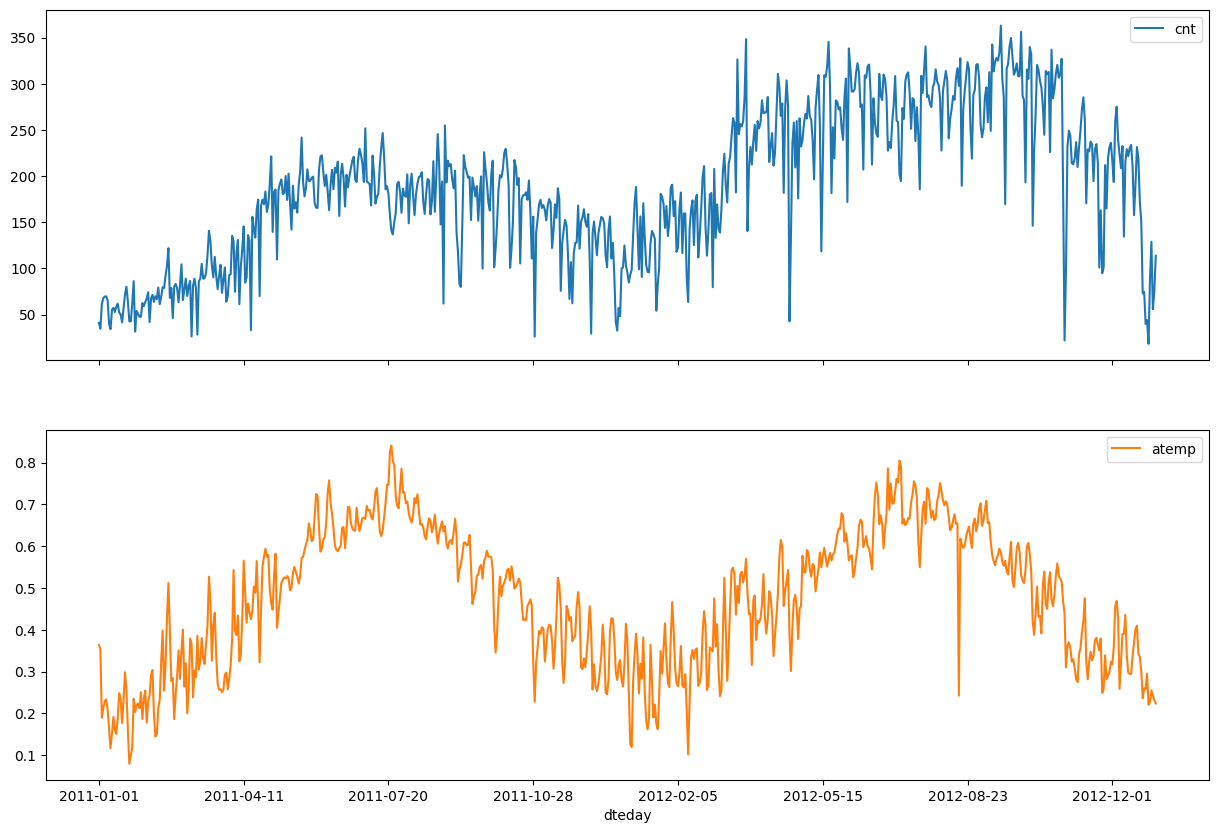

In [72]:
all_data.groupby("dteday").agg({target: "mean", "atemp":"mean"}).sort_values(by="dteday", ascending=True).plot(subplots=True, figsize=(15, 10))

In [ ]:
from ucimlrepo import fetch_ucirepo 
from typing import Dict 
from typing import Tuple 
import pandas as pd

def get_dataset() -> Tuple[pd.DataFrame, Dict]:
    """
    Get the dataset from UCI ML Repository.

    :return: Tuple of data and metadata
    """


    # fetch dataset 
    bike_sharing = fetch_ucirepo(id=275) 

    # data (as pandas dataframes) 
    X = bike_sharing.data.features 
    y = bike_sharing.data.targets 
    df = X.copy()

    categorical_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Categorical")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
    numerical_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Continuous")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
    binary_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Binary")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
    target = bike_sharing.variables[bike_sharing.variables["role"] == "Target"]["name"].tolist()[0]
    df[target] = y

    metadata = {
        "categorical_features": categorical_features,
        "numerical_features": numerical_features,
        "binary_features": binary_features,
        "target": target
    }
    return all_data , metadata